# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [2]:
from pathlib import Path
import numpy as np
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = WindowsPath('y:/Skola/OOP/Skolarbete/AI-Erik-Johansson-OPA23/lab2')


In [3]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

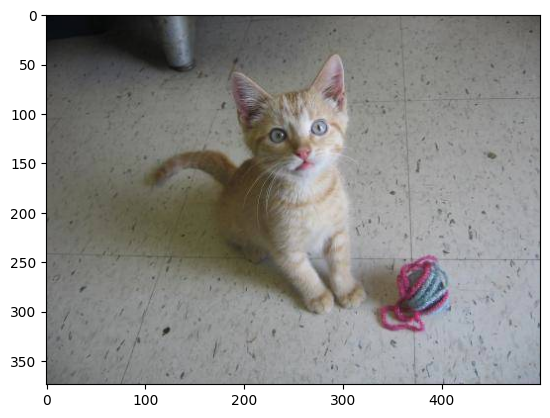

In [4]:
plt.imshow(images_random[0][0])

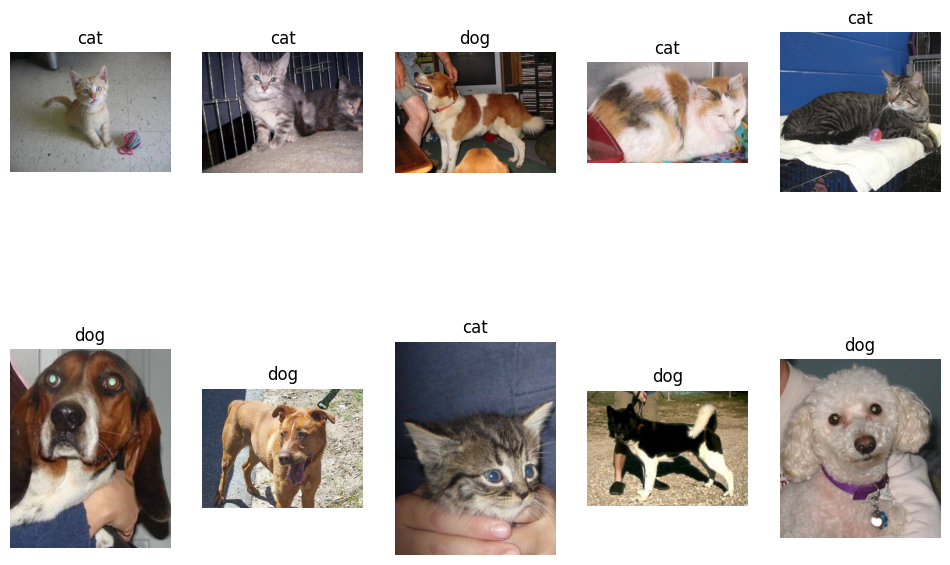

In [5]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [6]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [25]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

('y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\cat.9999.jpg',
 'y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\dog.9999.jpg')

In [52]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

(1250, 1250)

In [46]:
len(cat_small)

1250

In [63]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

800

In [65]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

200

In [54]:
for cat in cat_split:
    print(len(cat))

250
800
200


In [64]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    